In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1

В чём идея проверки гипотез с использованием статистических критериев? 

Рассматриваем пример сравнения двух выборок. 

**Решение**

Формулируем нулевую гипотезу, в которой нет разницы между группами, и альтернативную гипотезу о различии, пробуем опровергнуть нулевую гипотезу, если вероятность встретить такие выборки для нулевой гипотезы мала.

Статистические критерии строятся на том, чтобы опровергнуть равенство при некотором уровне ошибки первого рода. Они не оценивают вероятность того, что выборку различаются.

### 2

В чём различие односторонних и двусторонних альтернативных гипотез?

**Решение**

Двусторонняя, как можно догадаться из названия, проверяем неравенство метрик в обе стороны, а односторонняя только в одну сторону. Важно, что направление мы должны выбрать заранее, а не по результатам измеренных метрик, иначе ломается система тестирования.

### 3

Как выбирают статистику? Какими соображениями руководствуются?

**Решение**

Статистика должна соответствовать нашим данным (иначе как мы будем с помощью неё моделировать), с ней должно быть возможно работать (мы должны суметь оценивать вероятность для нашего значения статистики и считать функции распределения). 

Сама статистика должна быть такой, чтобы её распределение нам было известно при условии нулевой гипотезы, а чтобы альтернатива не описывалась этим же распределением, так как мы как раз будем проверять на соответствие этому распределению (если бы распределение соответствовало сразу нулевой и альтернативной гипотезе, то мы будто бы будем одновременно отвергать обе гипотезы).

### 4

Что такое p-value?

**Решение**

p-value нельзя путать с ошибками первого и второго рода. 

Основные составляющие p-value:
- вероятность такого же значения статистики и ещё более экстремального (то есть не только в одной точке)
- вычисляем при условии нулевой гипотезы (которую потом отвергаем, если вероятность будет низкой)

### 5

Ошибкой какого рода мы управляем при проверке гипотезы?

**Решение**

Фиксируем ошибку первого рода (ложноположительную ошибку), ошибкой второго рода (ложноотрицательные ошибки) управляем через выбор более мощных критериев.

Опять же, это основная идея, лежащая в статистических критериях.

### 6

Отметьте верные утверждения о выводах при применении статистических критериев:
- p-value показывает вероятность, обратную вероятности альтернативной гипотезы
- При помощи посчитанного p-value нельзя оценить вероятность того, что нулевая гипотеза верна
- Если p-value получился большим, чем выбранный критический уровень, то можно утверждать, что средние между группами равны
- p-value вычисляется в предположении верности нулевой гипотезы

**Решение**

p-value оценивает вероятность получить такое же или более экстремальное значение статистики при условии нулевой гипотезы, другие интерпретации для него не верны.

Статистические критерии могут отвергнуть нулевую гипотезу, но не могут её подтвердить, поэтому нельзя сказать, что p-value оценивает верность нулевой гипотезы.

То есть верны 2 и 4 пункты.

### 7

Почему на практике для непрерывных случайных величин используют t-критерий Стьюдента, а не z-критерий?

**Решение**

z-критерий предполагает известную дисперсию, а t-критерий Стьюдента позволяет использовать дисперсию, вычисленную по выборке, поэтому является более унивресальным.

t-критерий Сьюдента вряд ли можно считать более мощным, так как распределение Сьюдента по сравнению с нормальным имеет более тяжёлые хвосты, а само распределение Сьюдента приходится использовать как табличное в случае разных дисперсий.

### 8

Как можно было бы сформулировать нулевую гипотезу?

- Жаворонки зарабатывают больше денег, чем совы
- Употребление алкоголя в северном полушарии выше, чем в южном
- Наличие высшего образование не влияет на доход людей
- Средний рост людей в северном и южном полушарии не различается

**Решение**

Нулевая гипотеза формулируется как отсутствие эффекта, то есть средние значения между группами совпадают (это могут быть и другие статистики). В предположении равенства и оценивается вероятность встретить такое или более экстремальное развитие.

То есть под формулировку нулевой гипотезы подходят 3 и 4 пункты.

### 9

Представим, что у нас был процесс обзвона клиентов с предложением продлить подписку на наше приложение. Вероятность успеха составляла p=0.1 (каждый десятый звонок заканчивался продлением подписки).

Мы сделали новый алгоритм подбора клиентов для обзвона. Из 1000 тестовых звонков 113 закончились успешно.

Мы хотим проверить, значимо ли это отклонение от бейзлайна в 10%. Посчитайте p-value для нулевой гипотезы о равенстве доли p=0.1, альтернатива двусторонняя. Попробуйте сделать это вручную, без использования готовых библиотек (то есть используем модули про распределения, но не готовый статистический критерий). Учтите, что каждый звонок — распределение Бернулли и всё можно сделать точно и без использования центральной предельной теоремы.

Будьте осторожны — если вы будете вспоминать, как мы это делали на уроке, то осторожней с тем, какие квантили вы считаете (левый или правый хвост экстремальных значений). Для удобства можно визуализировать.

**Решение**

Для начала сделаем так же, как и на уроке: оценим вероятность попасть в критическую область и аналогичную с другой стороны.

Определим наше нулевое распределение:

In [2]:
from scipy.stats import binom

N = 1000
N_pos = 113
F_H0 = binom(n=1000, p=0.1)

Посчитаем вероятность (учётом, что 113 > 100 = 0.1 * 100, то есть посчитаем вероятность попасть от 113 до 1000 и от 0 до 87 = 100 - 13):

In [3]:
1 - F_H0.cdf(N_pos - 1) + F_H0.cdf(100 - 13)

0.18733716838368708

Сделаем то же самое через реализацию scipy:

In [4]:
from scipy.stats import binom_test

binom_test(x=N_pos, n=N, p=0.1, alternative='two-sided')

0.170513842236894

Ответы не совпадают, почему же так? 

Во-первых, они совпадут, если бы мы слева критический уровень считали не от 87, а от 86:

In [5]:
1 - F_H0.cdf(N_pos - 1) + F_H0.cdf(100 - 13 - 1)

0.17051384223689406

Но откуда берётся 86? Почему не 87?

На самом деле нельзя было симметрично отступать от 100 влево на 13, если наше наблюдаемое значение было 113.

Это работает в случае, если априорная вероятность равно 0.5 (например, с монеткой), тогда отступать в любую сторону — симметричные ситуации. В нашем же случае, 99 и 101 (соседи 100) — разные ситуации, их вероятности различны:

In [6]:
F_H0.pmf(99), F_H0.pmf(101)

(0.041970157352914934, 0.041600783030777085)

То же самое происходит с 87 и 113:

In [7]:
F_H0.pmf(87), F_H0.pmf(113)

(0.016823326146792893, 0.016109242401325042)

То есть 87 более вероятное значение, чем 113. Поэтому, когда мы считаем вероятность такого же или более критичного значения статистики, мы не должны брать 87, ведь это более вероятная ситуация. А вот 86 уже менее вероятная, так что её надо учитывать.

Собственно так и [сделано в реализации scipy](https://github.com/scipy/scipy/blob/v1.9.0/scipy/stats/_morestats.py#L2648-L2741) — вычисляются все вероятности и ищутся такие значения, вероятность которых не превосходит наблюдаемую сутуацию (113 в нашем случае).

Способ с переходом к симметричным значениям относительно центрального, как сделали мы, не совсем корректен, хотя и даёт часто такой же результат и вывод.

### 10

Теперь попробуем применить вручную t-критерий Стьюдента.

Представим, что мы проверяем, изменилась ли средняя температура в нашем городе. Мы провели 100 замеров в разное время суток и разных местах, получили среднее значение, равное 18.1 градусам, среднеквадратичное отклонение, оценённое по выборке, 8.2 градуса. Хотим проверить, изменилась ли средняя температура, если ранее она составляла 16.5 градусов.

Посчитайте p-value для t-критерия Стьдента, альтернатива двусторонняя.

In [8]:
from scipy.stats import t

mu0 = 16.5
N = 100

mu = 18.1
std = 8.2


Посчитаем t-статистику:

In [9]:
t_n = (mu - mu0) / (std / np.sqrt(N))

Посчитаем p-value как вероятность получить такое и более экстремальное значение статистики. Так как статистика лежит справа от центра (нуля, для этого мы берём модуль), то это вычисляется как 1 минус функция распределения в этой точке.
 
Альтернатива двусторонняя, поэтому не забываем умножить на 2, так как возможна симметричная ситуация.

In [10]:
2 * (1 - t(N-1).cdf(np.abs(t_n)))

0.05385741608695005

### 11

Вернёмся к датасету (fetch_california_housing) со средними ценами на дома, с которым мы работали на прошлых уроках.

Давайте оценим, отличаются ли средние доходы в тех районах, где дома моложе 30 лет и старше 30 лет. Мы уже изучали способы анализа взаимосвязи через коэффициенты корреляции, а теперь попробуем воспользоваться механизмом статистических критериев и проверить, совпадают ли средние.

Какой тест здесь наиболее корректно применять?

1. Величина среднего дохода вещественная, поэтому z-критерий для долей сразу отпадает.
2. У нас есть выборка и нет сведений о среднеквадратичном отклонении, поэтому z-критерии мы использовать не можем, остаются t-критерии Стьюдента.
3. У нас две выборки с независимыми друг от друга районами (нет соответствия между районами), поэтому тест нужен для независимых выборок.

### 12

Воспользуемся t-критерием Стьюдента для независимых выборок, чтобы сравнить средние значения доходов на равенство между районами с возрастом до 30 (включительно) и более 30, альтернатива двусторонняя.

Какое значение p-value вы получили? Можно ли говорить, что средние доходы различаются?

Внимательнее посмотрите на аргументы используемой функции, среди них есть флаг равенства дисперсий в выборках. Мы как раз не можем быть уверены, что дисперсии доходов одинаковые между выборками.

In [11]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [12]:
df1 = df[df.HouseAge <= 30]
df2 = df[df.HouseAge > 30]

In [13]:
from scipy.stats import ttest_ind

ttest_ind(
    df1.MedInc, df2.MedInc,
    equal_var=False,
    alternative='two-sided',
)

Ttest_indResult(statistic=12.832590060636896, pvalue=1.5106543204708846e-37)

### 13

А ведь про нормальность данных мы и позабыли! t-критерий Стьюдента хоть и устойчив, но предполагает, что данные должны быть распределены нормально.

Какие неудобства у способа проверки нормальности через QQ-plot есть по сравнению с тестом Шапиро-Уилка?

**Решение**

По идее QQ-plot похож на тест Шапиро-Уилка, поэтому считается не дольше (разве что построение самого графика тоже занимает время).

Сам метод представляет собой визуализацию квантилей, поэтому можно наглядно решить, из нормального ли распределения выборка. Однако это оставляет пространство для трактовок, в некоторых случаях сложно принять решение. 

К параметрам график достаточно устойчив (да и параметров особо нет).

### 14

Давайте проверим, а с какими данными мы работаем.  Хорошо бы делать это до применения критериев!

Во-первых, давайте посмотрим на гистограмму распределения.

Во-вторых, попробуйте построить qq-plot для наших выборок, оцените нормальность. Воспользуйтесь также тестом Шапиро-Уилка.

Что вы можете сказать?

Внимание, sm.qqplot не приводит вашу выборку к стандартной нормальной. Вам нужно самим нормализовать выборку так, чтобы среднее было нулевым, а дисперсия единичной. Тогда график будет информативным и можно будет сравнивать с диагональным.

In [14]:
import statsmodels.api as sm
from scipy.stats import shapiro

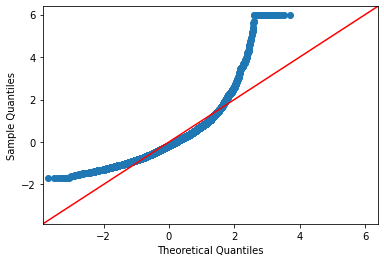

In [15]:
values = df2.MedInc
values = (values - np.mean(values)) / np.std(values)

sm.qqplot(values, line='45')
plt.show()

In [16]:
shapiro(df1.MedInc), shapiro(df2.MedInc)

/Users/emilkayumov/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.9215104579925537, pvalue=0.0),
 ShapiroResult(statistic=0.8525031805038452, pvalue=0.0))

Как часто и выглядят выборки про доходы — они визуально похожи на нормальные, но с тяжёлым правым хвостом. Критерий Шапиро-Уилка будет отвергать нормальность. 

### 15

Когда выборка похожа на нормальную, но имеет тяжёлый правый хвост, можно попробовать её логарифмировать.

Попробуйте повторить проверку нормальности для логарифмированной величины. Что у вас получилось?

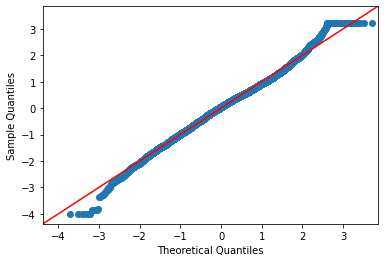

In [17]:
values = np.log(df2.MedInc)
values = (values - np.mean(values)) / np.std(values)

sm.qqplot(values, line='45')
plt.show()

In [18]:
shapiro(values)

/Users/emilkayumov/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9950175285339355, pvalue=1.283846514664363e-17)

По qq-plot можно увидеть, что квантили стали заметно ближе к теоретическим, а критерий Шапиро-Уилка всё так же уверенно отвергает нормальность.

t-критерий Стьюдента устойчив к отклонениям от нормальности, его можно было бы здесь применить.

### 16

Представим, что мы сравниваем две модели на небольшой выборке по метрике RMSE. Чтобы удостовериться, что это не шум, хотим применить статистический критерий для проверки равенства метрик между выборками. Какой тест был бы здесь наиболее применим?

**Решение**

1. Мы не знаем истинных среднеквадратичных отклонений, поэтому z-критерии нам не подходят.
2. Мы сравниваем две метрики на одной и той же выборке объектов, поэтому нам нужен тест для связанных выборок.

Таким образом, лучший вариант — t-критерий Стьюдента для связанных выборок.